# First draft: Perceptrons Revisited

Import the necessary libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from scipy.ndimage import label

In [2]:
# open folder
path = "/Users/tarasplint/Desktop/Scriptie/code/random_spirals"
files = os.listdir(path)

# load images
images = []
paths = []
for file in files:
    image = cv2.imread(path + "/" + file)
    # image = cv2.resize(image, (256, 256))
    image = cv2.resize(image, (128, 128))
    images.append(image)
    paths.append(file)

# normalize images
images = np.array(images)
images = images / 255.0

### Examples from the dataset:

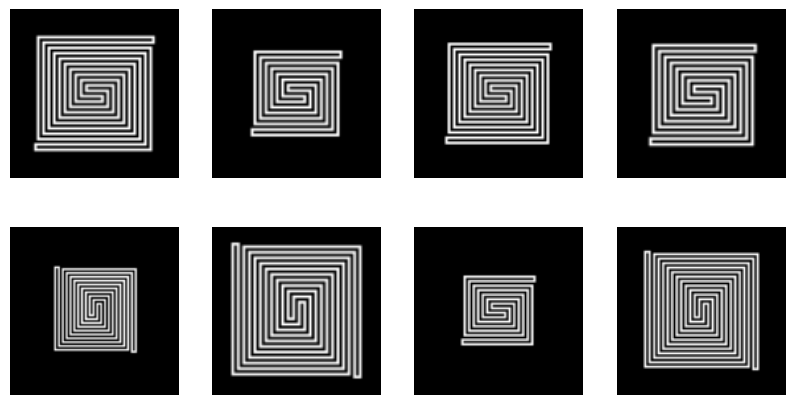

In [3]:
# print a few images
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()

Functions to perform CCL using both openCV and skimage: 


In [4]:
# apply CCL using cv2
def apply_ccl(image):
    image = image[:, :, 0]
    image = np.where(image > 0.5, 1, 0)
    image = np.uint8(image)
    _, labels = cv2.connectedComponents(image)
    return labels

# apply CCL using scipy
def apply_ccl_scipy(image):
    image = image[:, :, 0]
    image = np.where(image > 0.5, 1, 0)
    image = np.uint8(image)
    labels, _ = label(image)
    return labels

## CCL 

Example two spirals:

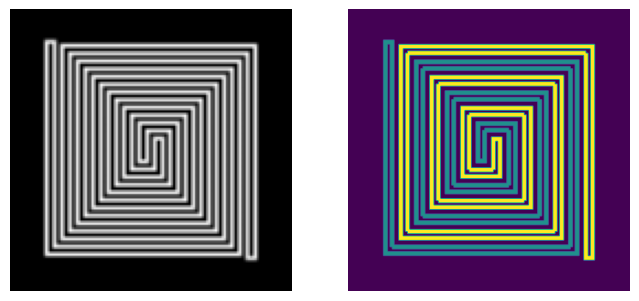

In [5]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(images[20])
plt.axis("off")
plt.subplot(1, 2, 2)
labels = apply_ccl(images[20])
plt.imshow(labels)
plt.axis("off")
plt.show()

Example one spiral:

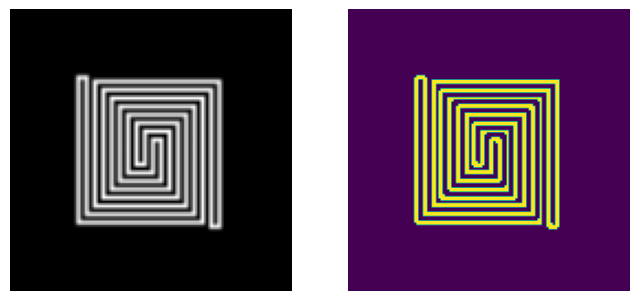

In [15]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(images[50])
plt.axis("off")
plt.subplot(1, 2, 2)
labels = apply_ccl(images[50])
plt.imshow(labels)
plt.axis("off")
plt.show()